# Find Teleconnections (precursor regions) via correlation maps 

In [2]:
import os
from RGCPD import RGCPD
from RGCPD import BivariateMI
from RGCPD import class_BivariateMI, functions_pp, core_pp
from IPython.display import Image
import numpy as np
import pandas as pd
import utils_sem

/home/svijverber/.conda/envs/RGCPD/lib/python3.8/site-packages/tigramite/independence_tests/gpdc.py:27: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/home/svijverber/.conda/envs/RGCPD/lib/python3.8/site-packages/tigramite/independence_tests/gpdc_torch.py:33: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/home/svijverber/.conda/envs/RGCPD/lib/python3.8/site-packages/tigramite/plotting.py:26: UserWarning: No module named 'networkx'
  warnings.warn(str(e))


In [3]:
path_obs_data = '/data/volume_2/observational/'

target = core_pp.import_ds_lazy(os.path.join(path_obs_data, 'chrips_1981-2021_target_new_left.nc'))

df_target = target['spatial_mean_raw'].to_dataframe()


# define input by filling list_of_name_path: 
# format list_of_name_path = [('TVname', 'TVpath'), ('prec_name', 'prec_path')]
list_of_name_path = [('', df_target.shift(-14)),
                    ('sst', os.path.join(path_obs_data, 'raw', 'era5_sst_1959-2021_1_12_daily_2.0deg.nc')),
                    ('t2m', os.path.join(path_obs_data, 'raw', 'era5_t2m_1959-2021_1_12_daily_2.0deg.nc'))]

# define analysis:
list_for_MI = [BivariateMI(name='sst', 
                           alpha=.01, FDR_control=True, lags=np.array([1]), 
                           distance_eps=700, min_area_in_degrees2=5, lag_as_gap=False)]#,
              # BivariateMI(name='t2m', 
              #              alpha=.01, FDR_control=True, lags=np.array([1]), 
              #              distance_eps=700, min_area_in_degrees2=5, lag_as_gap=False)]



# Time-handling subseasonal mode
4-week (28 day) mean periods that fall within OND period

In [4]:
rg = RGCPD(list_of_name_path=list_of_name_path,
           list_for_MI=list_for_MI,
           tfreq=28, # <- subseasonal forecasting mode, all data will be aggregated to 10-day means
           start_end_TVdate=('10-01', '12-31'), # <- defining target period 
           start_end_year=(1981, 2020),
           path_outmain='./output_lorentz')

In [5]:
rg.pp_precursors(detrend=True, anomaly=True, selbox=None)

Loaded pre-processed data of sst

Loaded pre-processed data of t2m



Option for pp_precursors to vary pre-processing of datasets by given a list as an argument:
An example: detrend=[True, {'sm1':False, 'sm2':False}]. This input means that default argument is True, except the variables sm1 and sm2 got a different argument. The precursor names sm1 and sm2 should refer to the names given in list_of_name_path.

### Post-processing Target Variable

Start linear detrending ...
Done
Visual test on 0th observationusing absolute anomalies w.r.t. climatology of smoothed concurrent day accross years
original tfreq of imported response variable is converted to desired 28 (daily) means


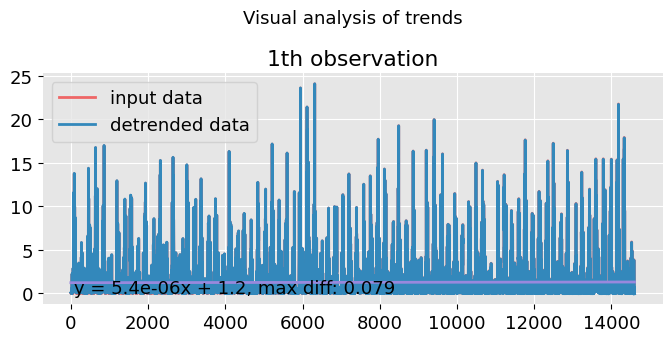

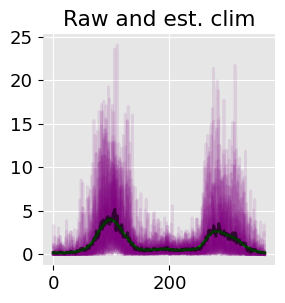

In [6]:
rg.pp_TV(detrend=True, anomaly=True)

In [7]:
rg.df_fullts

,spatial_mean_raw
1981-01-16,-0.103568
1981-02-13,0.158302
1981-03-13,2.619059
1981-04-10,2.696725
1981-05-08,-0.636272
...,...
2020-08-28,-0.117422
2020-09-25,-0.629313
2020-10-23,-0.140475
2020-11-20,-0.706749


In [8]:
rg.traintest(method='leave_10', gap_prior=1, gap_after=1, seed=2)
# rg._get_testyrs()[0] # see test years

In [9]:
rg.calc_corr_maps() 


sst - calculating correlation maps
Progress traintest set 100%, trainsize=(90dp, 75%)



Plotting sst
Plotting Corr maps sst, split 0, lag 1


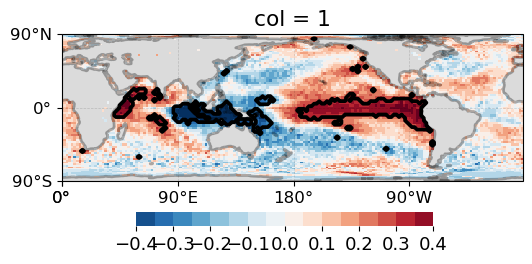

In [10]:
rg.plot_maps_corr()

In [11]:
rg.cluster_list_MI()

Plotting Corr maps sst_labels_init, split 0, lag 1


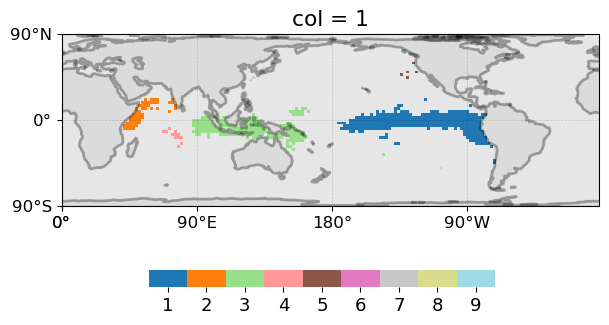

In [12]:
rg.quick_view_labels(mean=True) 

In [13]:
rg.get_ts_prec()


Getting MI timeseries
There are [9, 7, 9, 10] regions in total (list of different splits)


From the correlation (BivariateMI) map, the timeseries are named according the format:
{lag}..{region label}..{precursor name}, where precursor name is defined in list_of_name_path. 

In [14]:
rg.df_data

spatial_mean_raw  1..1..sst  1..2..sst  1..3..sst  1..4..sst  \
0 1981-01-16         -0.103568  -0.765630   0.050858  -0.164024   0.046302   
  1981-02-13          0.158302  -0.791330   0.103985  -0.141288  -0.350913   
  1981-03-13          2.619059  -0.431349   0.069712  -0.192398   0.067447   
  1981-04-10          2.696725  -0.321343  -0.106327  -0.113542  -0.152507   
  1981-05-08         -0.636272  -0.140138   0.121163   0.036736   0.083379   
...                        ...        ...        ...        ...        ...   
3 2020-08-28         -0.117422  -0.749096   0.008321   0.463049   0.151712   
  2020-09-25         -0.629313  -0.943468  -0.007358   0.382867   0.280339   
  2020-10-23         -0.140475  -1.086677   0.141915   0.306654   0.754320   
  2020-11-20         -0.706749  -1.048721   0.086959   0.240014   0.805030   
  2020-12-18          0.031020  -0.920013   0.102040   0.163127   0.503323   

              1..5..sst  1..6..sst  1..7..sst  1..8..sst  1..10..sst  \
0 1981-01-16   0.347033   0.234745  -0.665822   0.262855   -0.114452   
  1981-02-13   0.351260   0.209844  -0.249428   0.357238   -0.091547   
  1981-03-13   0.114395   0.286088  -0.354726   1.034040   -0.011823   
  1981-04-10  -0.131576   0.285729  -0.202257   0.174007   -0.005795   
  1981-05-08  -0.099743   0.570703  -0.308869   0.207162   -0.097910   
...                 ...        ...        ...        ...         ...   
3 2020-08-28   0.526844   0.153583  -0.070564  -0.617164    0.368953   
  2020-09-25   1.151830   0.153857  -0.372547   0.079961    0.177205   
  2020-10-23   0.961135   0.181842   0.081014   0.446801    0.159522   
  2020-11-20   0.152279   0.007079   0.440523   0.150529    0.228749   
  2020-12-18   0.024769  -0.056415   0.329935   0.236084   -0.010076   

              1..9..sst  TrainIsTrue  RV_mask  
0 1981-01-16        NaN            0    False  
  1981-02-13        NaN            0    False  
  1981-03-13        NaN            0    False  
  1981-04-10        NaN            0    False  
  1981-05-08        NaN            0    False  
...                 ...          ...      ...  
3 2020-08-28   0.346278            0    False  
  2020-09-25   0.037547            0    False  
  2020-10-23  -0.176128            0     True  
  2020-11-20  -0.064287            0     True  
  2020-12-18  -0.312147            0     True  

[2080 rows x 13 columns]

## Train-test cross-validation and Response Variable mask handling

- The different train-test folds are organized in the first level index.
- Each fold contains precursor timeseries that were extracted from only training data.
- The Training data is specified by the TrainIsTrue mask.
- The Response Variable mask defined the dates to predict 
- The RV_mask the anker for lag shifting the precursors.

The last two columns should be always present. 
- The RV_mask is defined by the start_end_TVdate.
- The TrainIsTrue is defined by the method for cross-validation.


# Forecasting pipeline

In [15]:
from RGCPD.forecasting import func_models as fc_utils
from RGCPD.forecasting.stat_models_cont import ScikitModel
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegressionCV

model = ScikitModel(LogisticRegressionCV, verbosity=0)
kwrgs_model = {'kfold':5,
               'scoring':'neg_brier_score'}

# get original binary
target_ts = target['binary'].sel(time=rg.df_fullts.index).to_dataframe()
target_ts = pd.concat([target_ts]*rg.n_spl, keys=range(rg.n_spl)) # make it align with train-test multi-index


BSS = fc_utils.ErrorSkillScore(constant_bench=0.33).BSS
score_func_list = [BSS, fc_utils.metrics.roc_auc_score]
    
# get df_data with shifted lags 
df_data_shifted, target_fit = utils_sem.get_lag_shifted(df_data=rg.df_data.copy(), target_ts=target_ts.copy(), 
                                              lags_i = [1,2], labels=None)

keys = [k for k in df_data_shifted.columns[:-2] if 'sst' in k]

out = rg.fit_df_data_ridge(target=target_fit,
                           keys=keys,
                           df_data=df_data_shifted,
                           fcmodel=model,
                           kwrgs_model=kwrgs_model,
                           transformer=fc_utils.standardize_on_train,
                           tau_min=0, tau_max=0)
predict, weights, model_lags = out

predict.index = df_data_shifted.iloc[:,-2:].index
df_train_m, df_test_s_m, df_test_m, df_boot = fc_utils.get_scores(predict,
                                                                 df_data_shifted.iloc[:,-2:],
                                                                 score_func_list,
                                                                 n_boot = 100,
                                                                 score_per_test=False,
                                                                 blocksize=1,
                                                                 rng_seed=1)
lag = 0

print(model.scikitmodel.__name__, '\n', f'Test score at lag {lag}\n',
      'BSS {:.2f}\n'.format(df_test_m.loc[0].loc[lag].loc['BSS']),
      'AUC {:.2f}'.format(df_test_m.loc[0].loc[lag].loc['roc_auc_score']),
      '\nTrain score\n',
      'BSS {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['BSS']),
      'AUC {:.2f}'.format(df_train_m.mean(0).loc[lag]['roc_auc_score']))


/home/svijverber/.conda/envs/RGCPD/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionCV 
 Test score at lag 0
 BSS -0.05
 AUC 0.60 
Train score
 BSS 0.20
 AUC 0.80


0              
        BSS roc_auc_score
0 -0.048811      0.598125

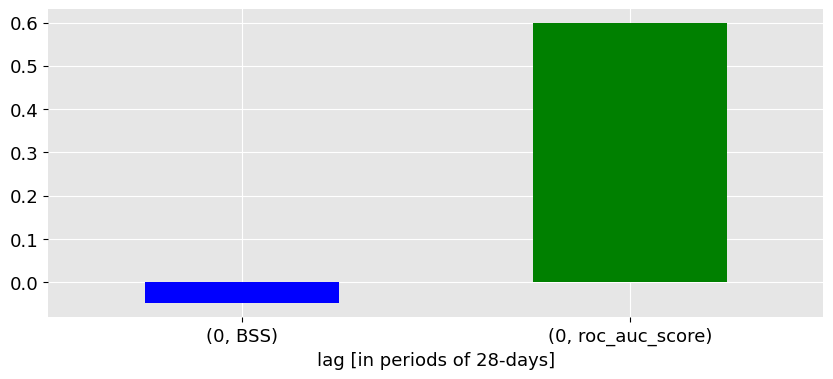

In [16]:
ax = df_test_m.loc[0].plot.bar(rot=0, color=['blue', 'green', 'purple'], figsize=(10,4))
ax.set_xlabel('lag [in periods of 28-days]')
df_test_m

/home/svijverber/.conda/envs/RGCPD/lib/python3.8/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


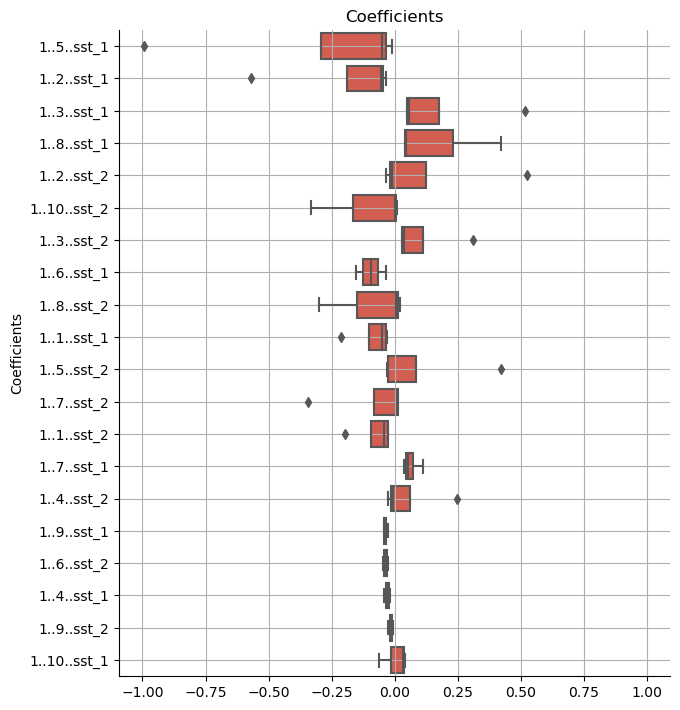

In [18]:
from RGCPD.forecasting.stat_models import plot_importances
coeff, fig = plot_importances(models_splits_lags=model_lags, lag=0)
fig

## Causal Discovery using Tigramite

In [ ]:
# rg.PCMCI_df_data(tigr_function_call='run_pcmci',
#                  kwrgs_tigr={'tau_min': 1,
#                              'tau_max': 1,
#                              'pc_alpha': .2,
#                              'max_conds_dim': 2,
#                              'max_combinations': 1,
#                              'max_conds_py': 2,
#                              'max_conds_px': 0})

In [ ]:
# rg.PCMCI_get_links(var=rg.TV.name, alpha_level=.2, FDR_cv=False)
# rg.df_links

In [ ]:
# # on the left you see all the extraction precursor regions, on the right you see the regions which were found Conditionally Dependent (~Causal)
# rg.plot_maps_sum()